In [1]:
cd ..

/home/abhishekabhishek/git/UnsupGenModbyMPS


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp

from MPScumulant import MPS_c
import mps_circuit_helpers
import mps_circuit
import metrics

In [3]:
%load_ext autoreload

In [4]:
data = np.load('BStest/BSdata.npy')
print(data.shape, data.dtype)

# convert bool data to int
data = data.astype(np.int32)

(30, 4, 4) bool


(<Figure size 1296x1080 with 30 Axes>, <Axes: >)

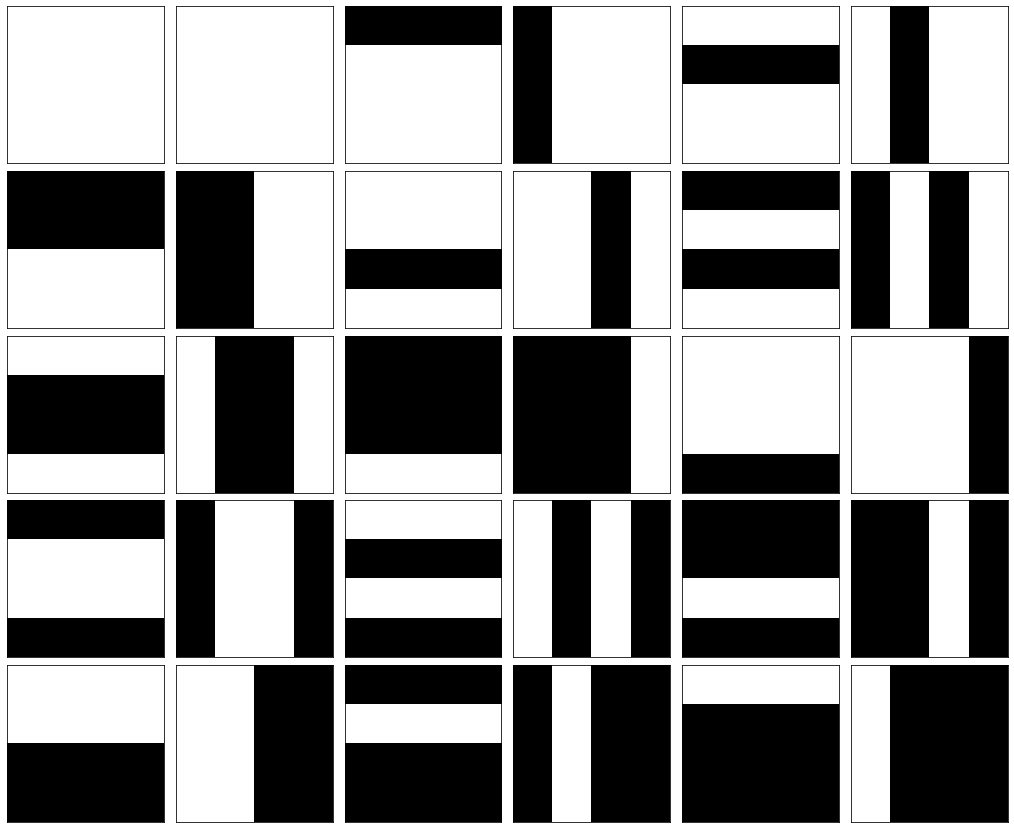

In [5]:
%autoreload
metrics.plot_BAS(data)

In [6]:
%autoreload
m = MPS_c(16, max_bond_dim=300)
m.loadMPS('BS-MPS')

# check the properties of the matrices in the MPS
print("core tensor index, shape")
for i in range(len(m.matrices)):
    tn_core = m.matrices[i]
    print(i, tn_core.shape)

core tensor index, shape
0 (1, 2, 2)
1 (2, 2, 4)
2 (4, 2, 8)
3 (8, 2, 15)
4 (15, 2, 16)
5 (16, 2, 16)
6 (16, 2, 16)
7 (16, 2, 15)
8 (15, 2, 16)
9 (16, 2, 16)
10 (16, 2, 16)
11 (16, 2, 15)
12 (15, 2, 8)
13 (8, 2, 4)
14 (4, 2, 2)
15 (2, 2, 1)


In [7]:
mps_circuit_helpers.are_isometries(m)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) True True
1 (2, 2, 4) True True
2 (4, 2, 8) True True
3 (8, 2, 15) True False
4 (15, 2, 16) True False
5 (16, 2, 16) True False
6 (16, 2, 16) True False
7 (16, 2, 15) True False
8 (15, 2, 16) True False
9 (16, 2, 16) True False
10 (16, 2, 16) True False
11 (16, 2, 15) True False
12 (15, 2, 8) True False
13 (8, 2, 4) True False
14 (4, 2, 2) False False
15 (2, 2, 1) False False


In [8]:
%autoreload
mps_unitaries = mps_circuit_helpers.get_mps_unitaries(m)

padding the mps core tensors
idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 8), 4
i = 3, (8, 2, 16), 8
i = 4, (16, 2, 16), 16
i = 5, (16, 2, 16), 16
i = 6, (16, 2, 16), 16
i = 7, (16, 2, 16), 16
i = 8, (16, 2, 16), 16
i = 9, (16, 2, 16), 16
i = 10, (16, 2, 16), 16
i = 11, (16, 2, 16), 16
i = 12, (16, 2, 8), 16
i = 13, (8, 2, 4), 8
i = 14, (4, 2, 2), 4
left canonicalizing the padded MPS
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
bond: 11
bond: 12
bond: 13
bond: 14


In [9]:
print(len(mps_unitaries))
mps_unitaries[0]

15


array([[ 5.09668874e-49, -2.50767571e-16,  1.00000000e+00,
         2.51213395e-33],
       [ 9.10132301e-01, -1.08826605e-01, -2.72901835e-17,
        -3.99769889e-01],
       [ 7.79256257e-03,  9.69212796e-01,  2.43047139e-16,
        -2.46101265e-01],
       [ 4.14244457e-01,  2.20869479e-01,  5.53869027e-17,
         8.82959910e-01]])

(<Figure size 1296x1224 with 1 Axes>, <Axes: >)

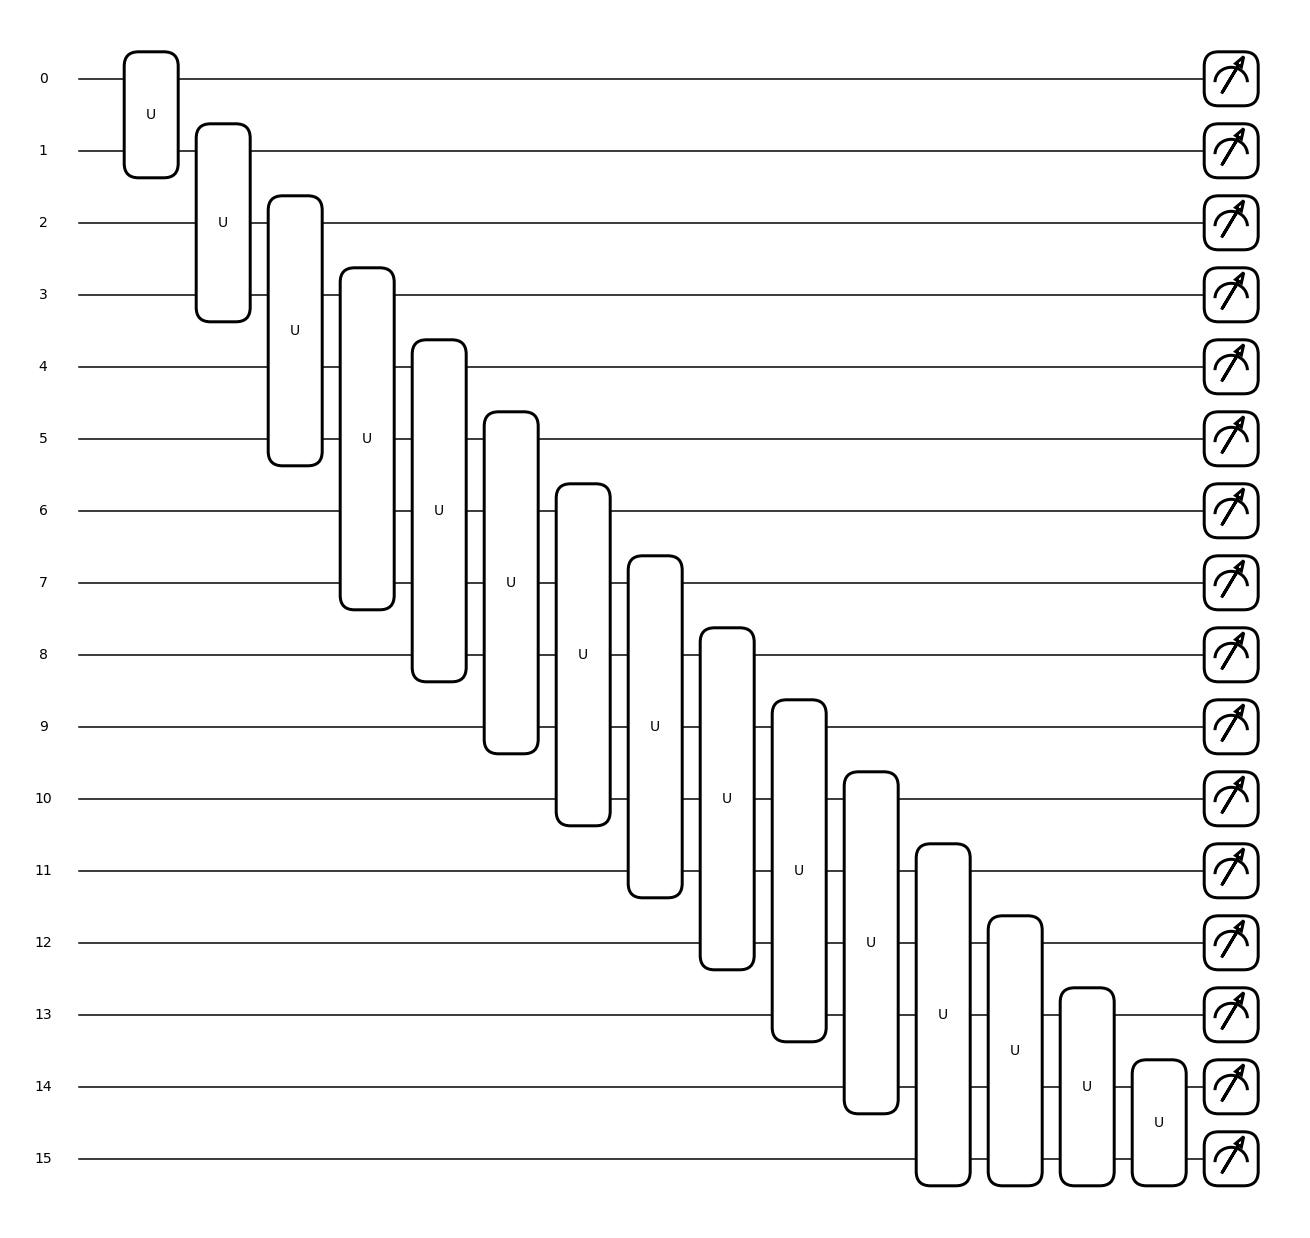

In [10]:
%autoreload
circuit = mps_circuit.mps_unitaries_to_circuit(mps_unitaries, shots=100000)
qml.drawer.draw_mpl(circuit)()

In [11]:
samples = circuit()

Frequency : 126
Frequency : 113
Frequency : 110
Frequency : 109
Frequency : 103
Frequency : 99
Frequency : 93
Frequency : 91
Frequency : 91
Frequency : 88
Frequency : 86
Frequency : 83
Frequency : 83
Frequency : 83
Frequency : 82
Frequency : 81
Frequency : 79
Frequency : 78
Frequency : 78
Frequency : 75
Frequency : 73
Frequency : 73
Frequency : 73
Frequency : 72
Frequency : 69
Frequency : 68
Frequency : 68
Frequency : 68
Frequency : 68
Frequency : 65


(<Figure size 1296x1080 with 30 Axes>, <Axes: >)

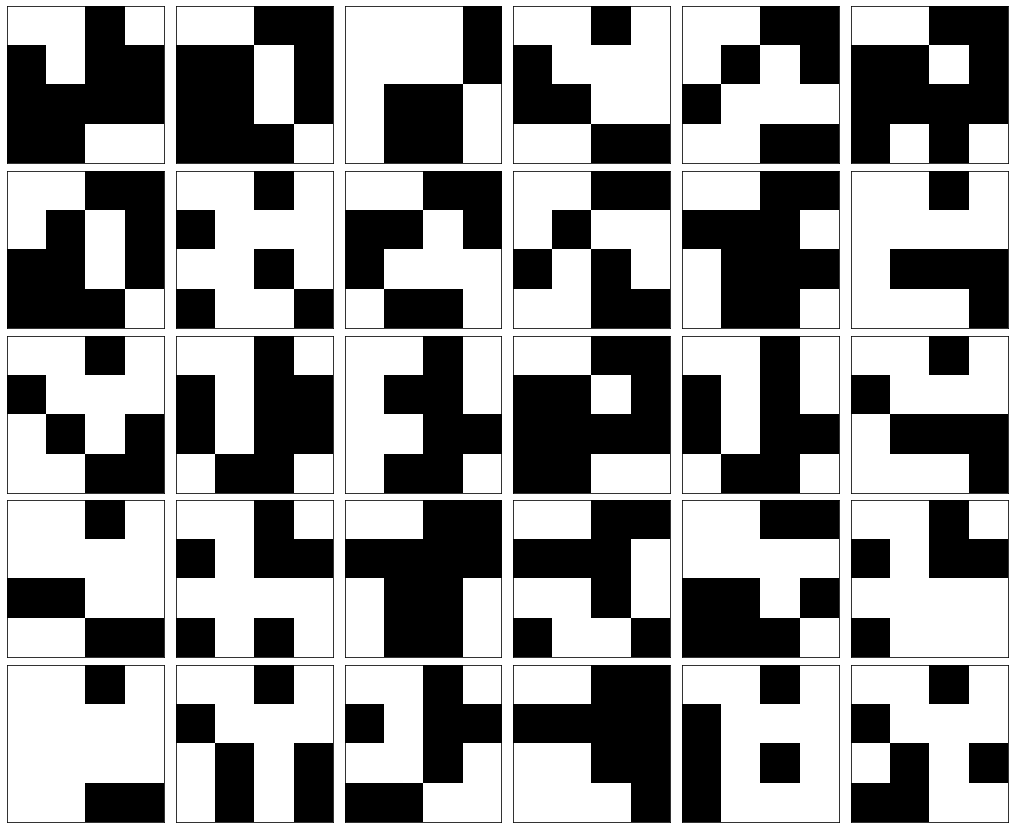

In [29]:
%autoreload
metrics.plot_top_samples(samples)

In [23]:
mps_samples = np.zeros((30, 4, 4))
for i in range(30):
    mps_samples[i] = m.generate_sample().reshape(4, 4)
    
%autoreload
metrics.plot_BAS(mps_samples)